___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [ ]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [8]:
# CODE HERE

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [11]:
# CODE HERE

In [12]:
df.isna().sum().sum()

np.int64(0)

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<Axes: xlabel='Churn', ylabel='count'>

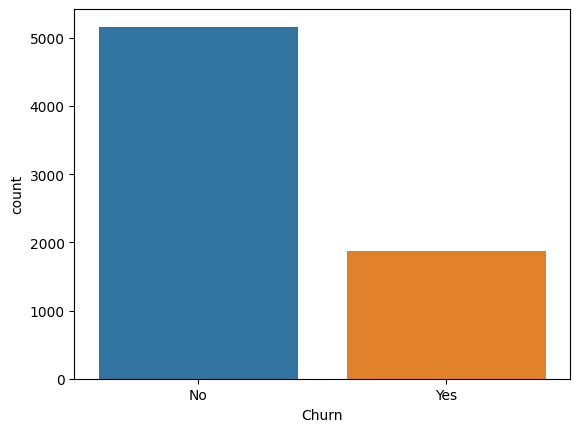

In [13]:
sns.countplot(df,x='Churn',hue='Churn')

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

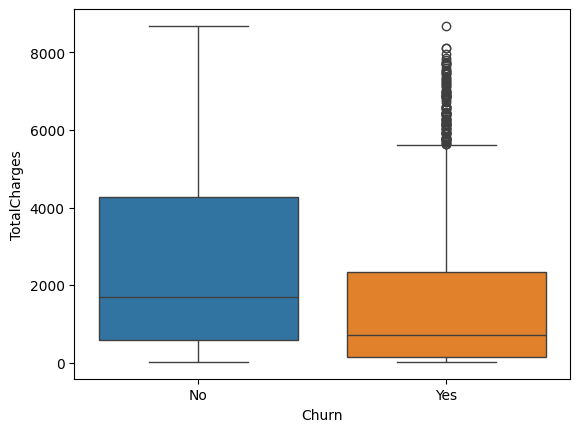

In [14]:
sns.boxplot(df,y='TotalCharges',x='Churn',hue='Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

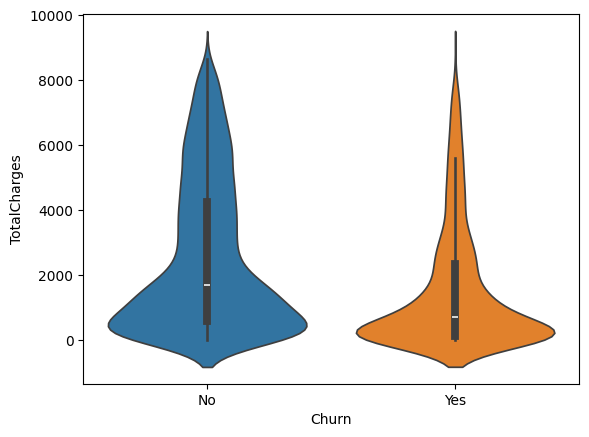

In [15]:
sns.violinplot(df,y='TotalCharges',x='Churn',hue='Churn')

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

<Axes: xlabel='Contract', ylabel='TotalCharges'>

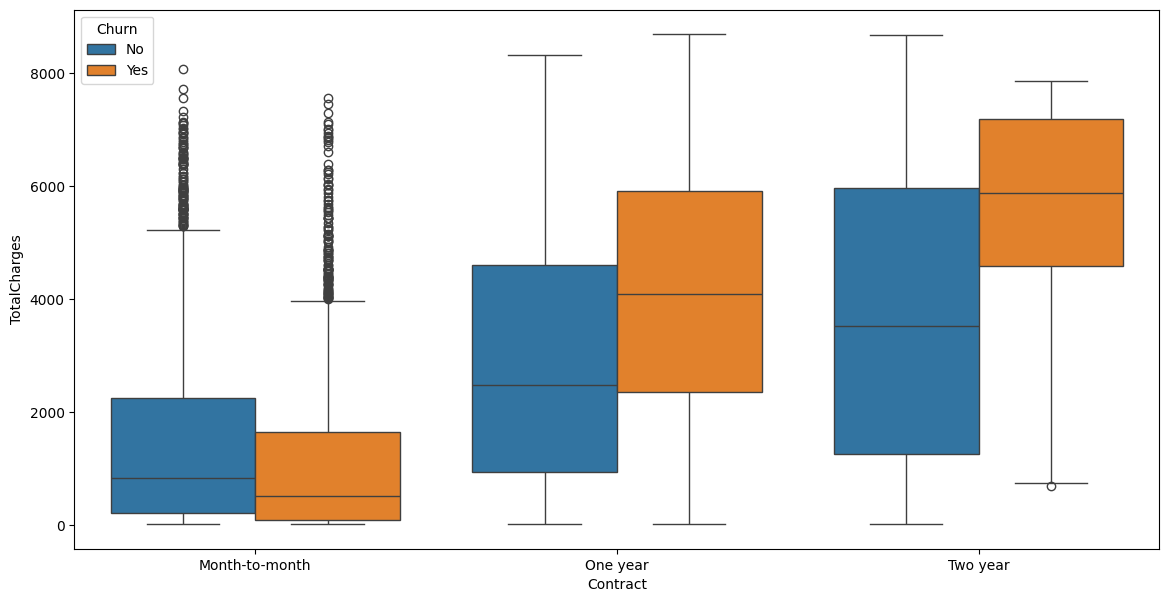

In [16]:
plt.figure(figsize=(14,7))
sns.boxplot(df,y='TotalCharges',x='Contract',hue='Churn')

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [17]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']])

In [18]:
corr_df = corr_df.corr()['Churn_Yes'][:-2].sort_values()

In [19]:
corr_df

Contract_Two year                         -0.301552
OnlineSecurity_No internet service        -0.227578
StreamingMovies_No internet service       -0.227578
TechSupport_No internet service           -0.227578
InternetService_No                        -0.227578
OnlineBackup_No internet service          -0.227578
DeviceProtection_No internet service      -0.227578
StreamingTV_No internet service           -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

C:\Users\XPC\AppData\Local\Temp\ipykernel_12680\965457736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(corr_df,palette='viridis',legend=False)


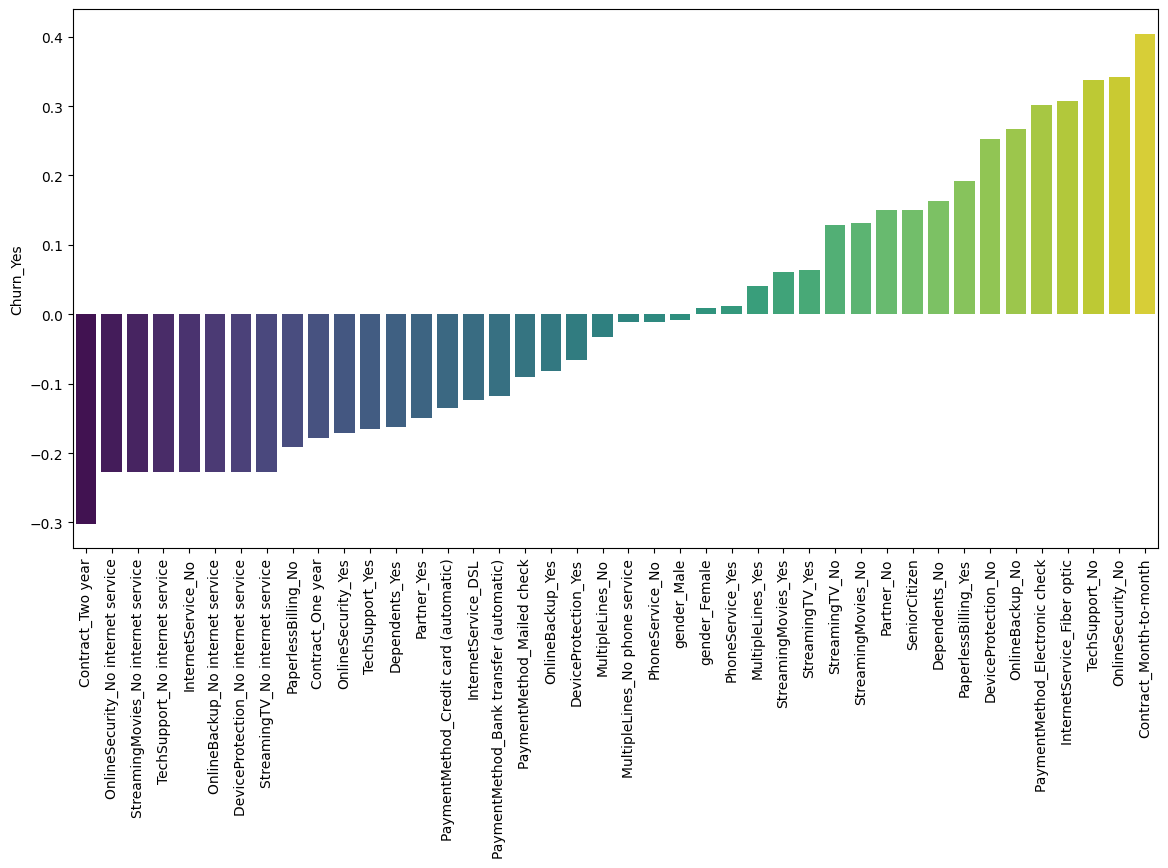

In [64]:
plt.figure(figsize=(14,7))
sns.barplot(corr_df,palette='viridis',legend=False)

plt.xticks(rotation=90);

'''
in series like this to do the coloring with hue no future warning you gotta:
sns.barplot(
    x='Feature',
    y='Importance',
    data=feats.reset_index().rename(columns={'index':'Feature'}),
    palette='viridis',
    hue='Feature',
    legend=False
)

'''

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [21]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

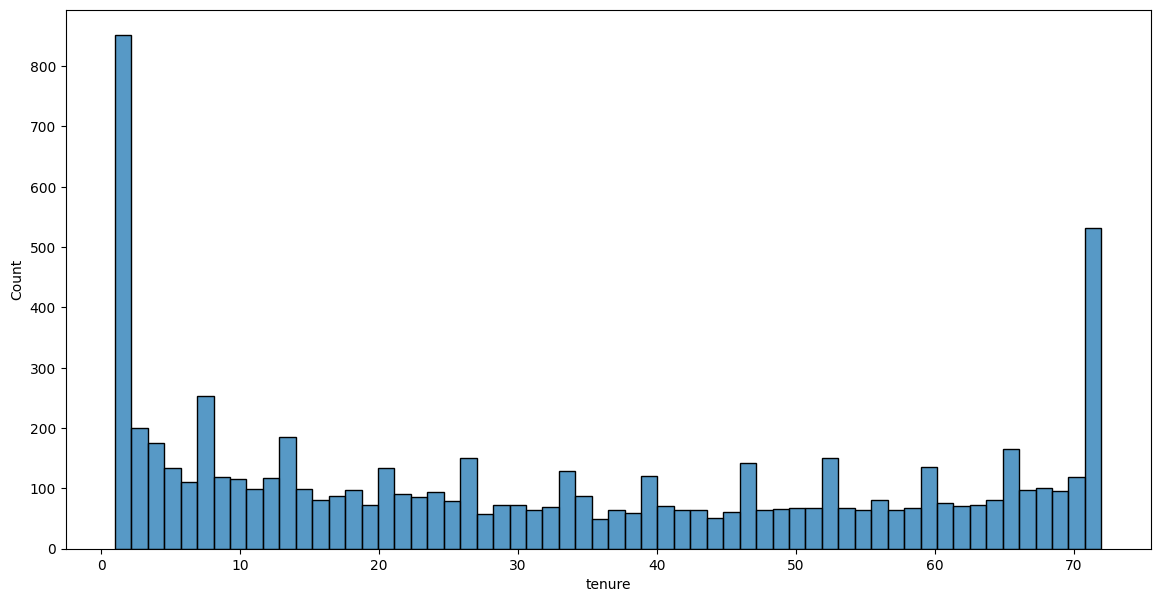

In [22]:
plt.figure(figsize=(14,7))
sns.histplot(df,x='tenure',bins=60)

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

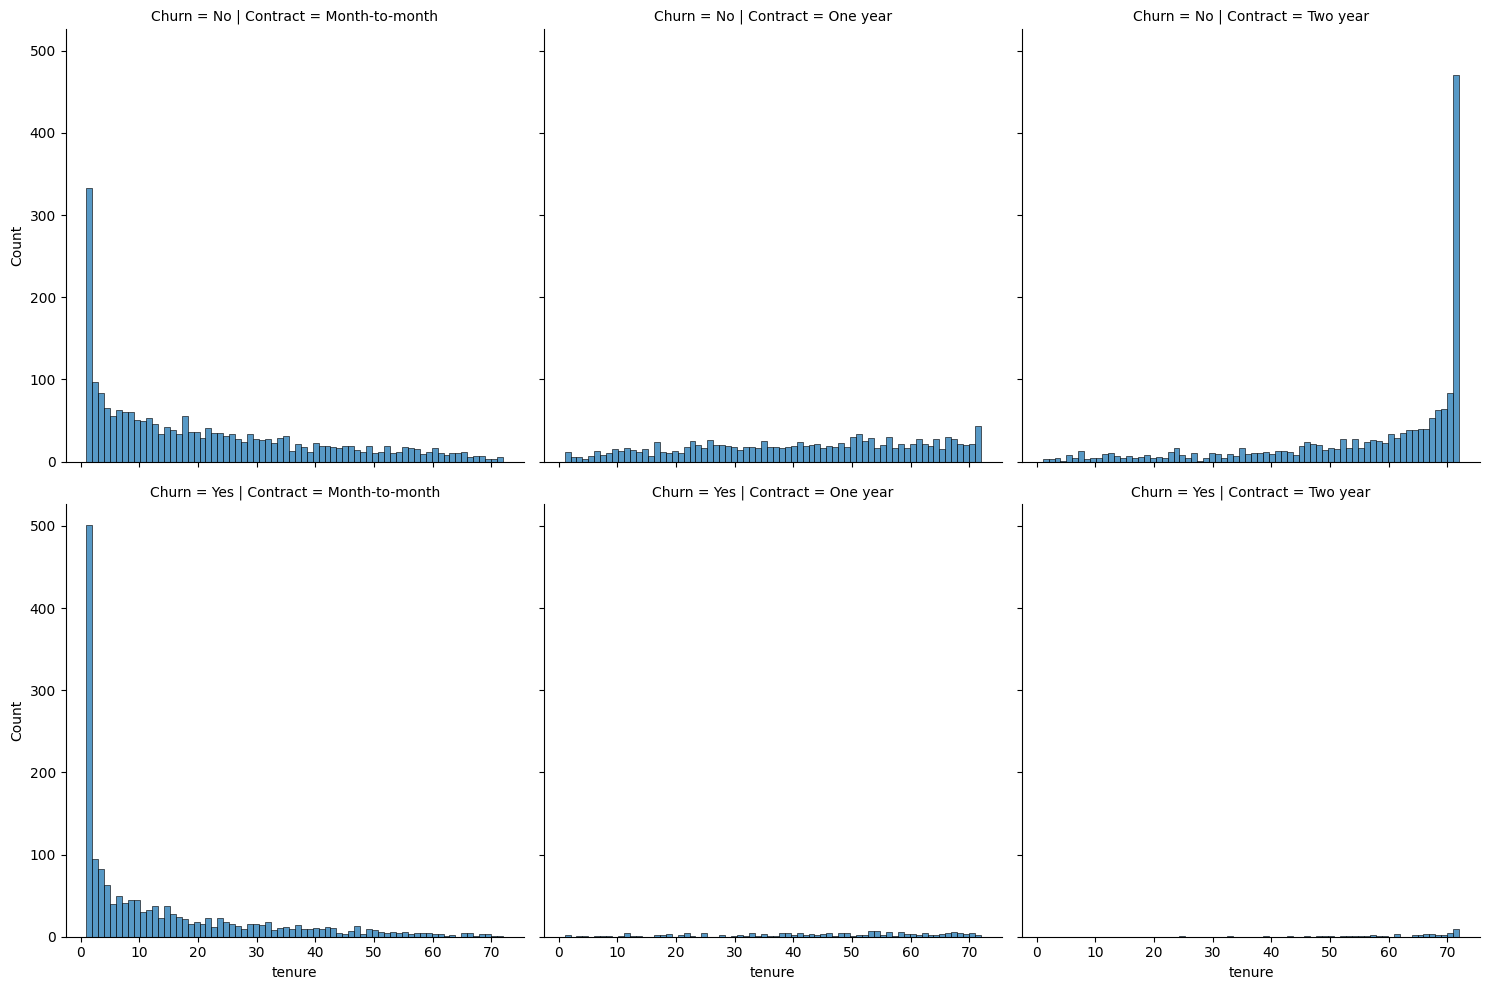

In [23]:
sns.displot(df,x='tenure',row='Churn',col='Contract',bins=70);

<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

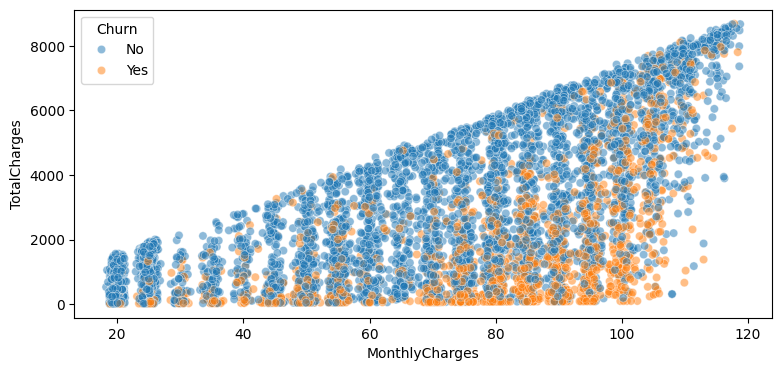

In [24]:
plt.figure(figsize=(9,4))
sns.scatterplot(df,y='TotalCharges',x='MonthlyCharges',hue='Churn',alpha=0.5)

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [25]:
gp = df.groupby(['Churn','tenure']).count().transpose()[:1]

In [26]:
rate = (100 * gp['Yes'] / (gp['Yes'] + gp['No'])).transpose()

In [27]:
rate.columns = ['Churn Rate']

In [28]:
rate

,Churn Rate
tenure,
1,61.990212
2,51.680672
3,47.000000
4,47.159091
5,48.120301
...,...
68,9.000000
69,8.421053
70,9.243697


**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

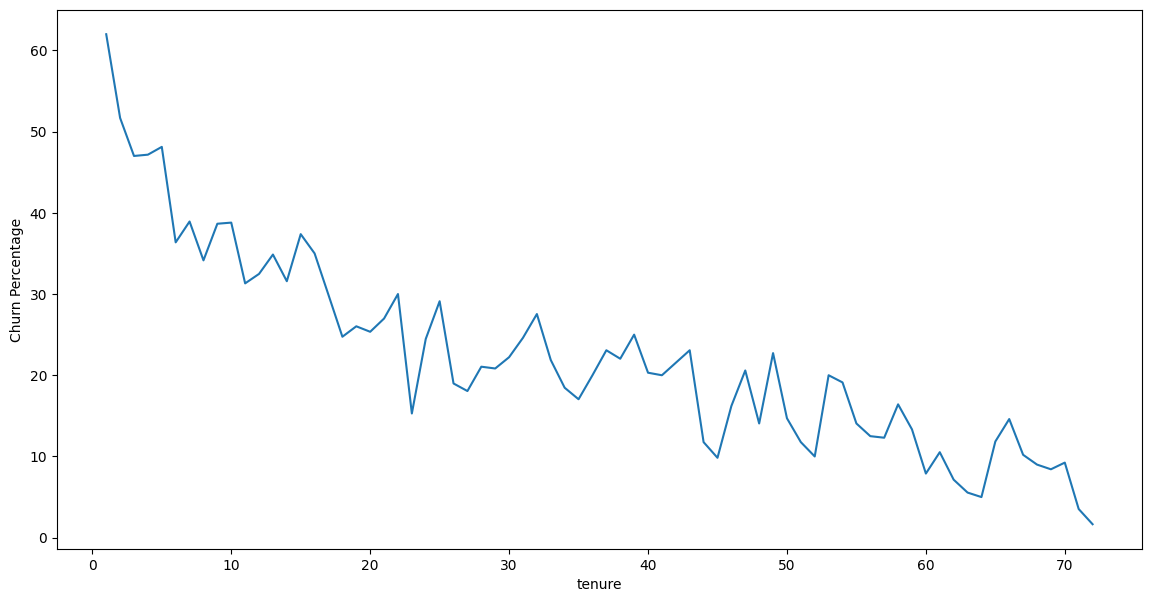

In [29]:
plt.figure(figsize=(14,7))
plt.plot(rate.index,rate['Churn Rate'])

plt.xlabel('tenure')
plt.ylabel('Churn Percentage');

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [30]:
# tenu = rate.reset_index()['tenure'].to_frame() you DID THIS BEFORE, WRONG, CUZ RATE IS LIKE 72 ROWS GROUPED BY.

tenu = df['tenure'].to_frame() # to_frame() so that we could add new columns

In [31]:
tenu 

,tenure
0,1
1,34
2,2
3,45
4,2
...,...
7027,24
7028,72
7029,11
7030,4


In [32]:
def funct(x):
    if x < 13:
        return '0-12 Months'
    elif x < 25:
        return '12-24 Months'
    elif x < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [33]:
tenu['Tenure Cohort'] = tenu['tenure'].apply(funct)

In [34]:
tenu

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


In [35]:
tenu

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

In [36]:
df['Tenure Cohort'] = tenu['Tenure Cohort'] # couldve done df directly but used tenu for learning

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

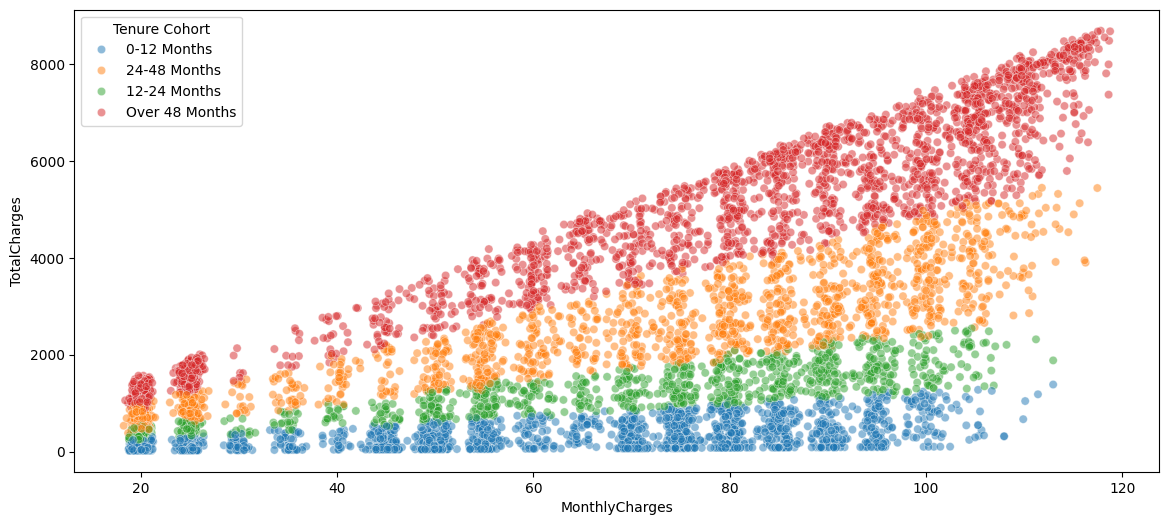

In [37]:
plt.figure(figsize=(14,6))
sns.scatterplot(df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',alpha=0.5)

**TASK: Create a count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

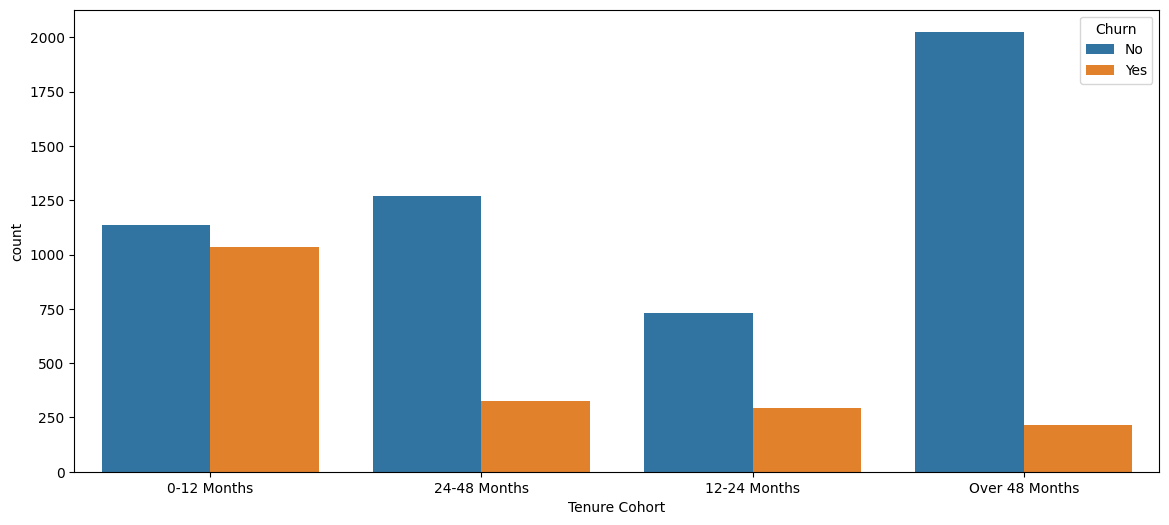

In [38]:
plt.figure(figsize=(14,6))
sns.countplot(df,x='Tenure Cohort',hue='Churn')

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

<Figure size 1400x600 with 0 Axes>

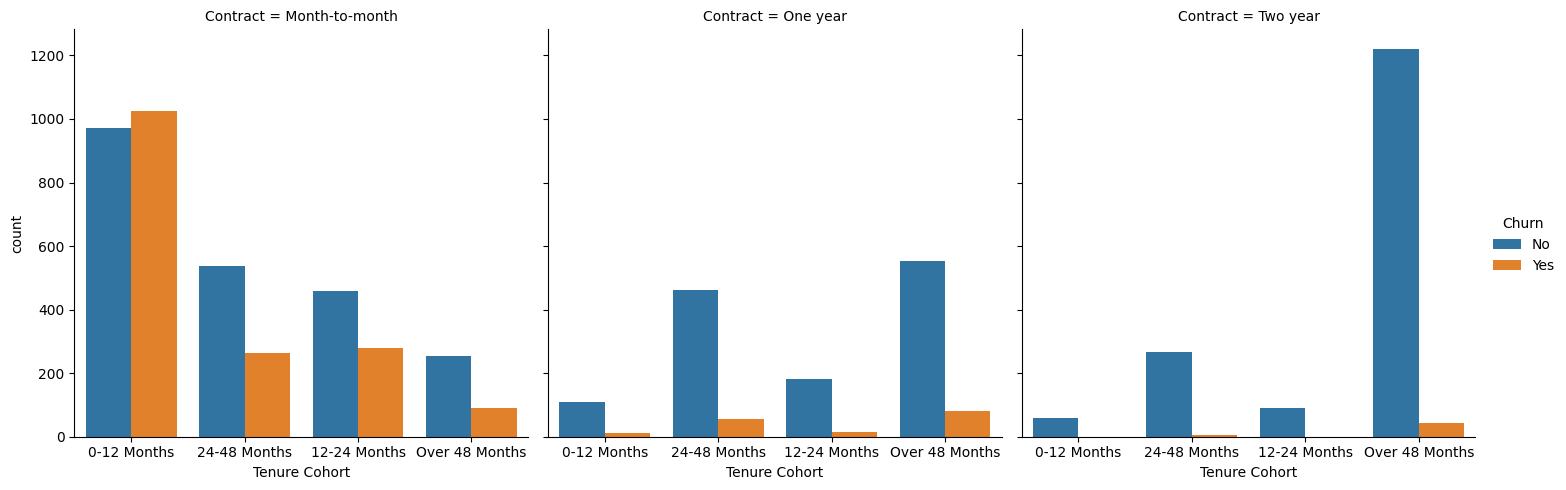

In [39]:
plt.figure(figsize=(14,6))
sns.catplot(df,x='Tenure Cohort',hue='Churn',kind='count',col='Contract');

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [40]:
pd.set_option('display.max_column',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [41]:
X = pd.get_dummies(df.drop(['customerID','Tenure Cohort','Churn'],axis=1), drop_first=True)

In [42]:
y = df['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=101)

params = {'max_depth':[2,3,4,5,6], 'max_features':['sqrt',None]}
grid_dt = GridSearchCV(dt,params)

In [46]:
grid_dt.fit(X_train,y_train)

,estimator,DecisionTreeC...dom_state=101)
,param_grid,"{'max_depth': [2, 3, ...], 'max_features': ['sqrt', None]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [47]:
grid_dt.best_params_

{'max_depth': 5, 'max_features': None}

In [48]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [49]:
dt_preds = grid_dt.predict(X_test)
print(classification_report(y_test,dt_preds))

# Dont worry CV gives chooses the best params based on that big train data, in the small test is just lucky that 6 depth is better

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



In [227]:
# Dont worry CV gives chooses the best params based on that big train data, in the small test is just lucky that 6 depth is better

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



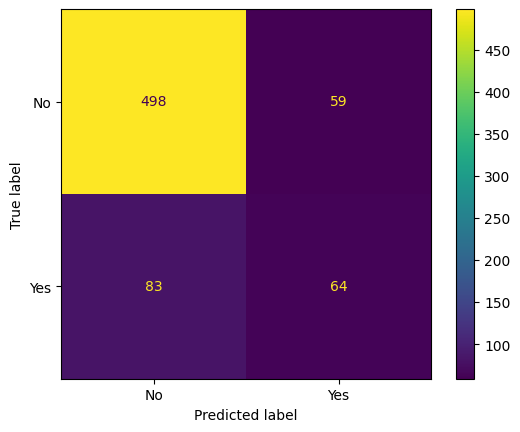

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test,dt_preds)

In [51]:
feats = pd.DataFrame(grid_dt.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
feats = feats.sort_values('Importance')

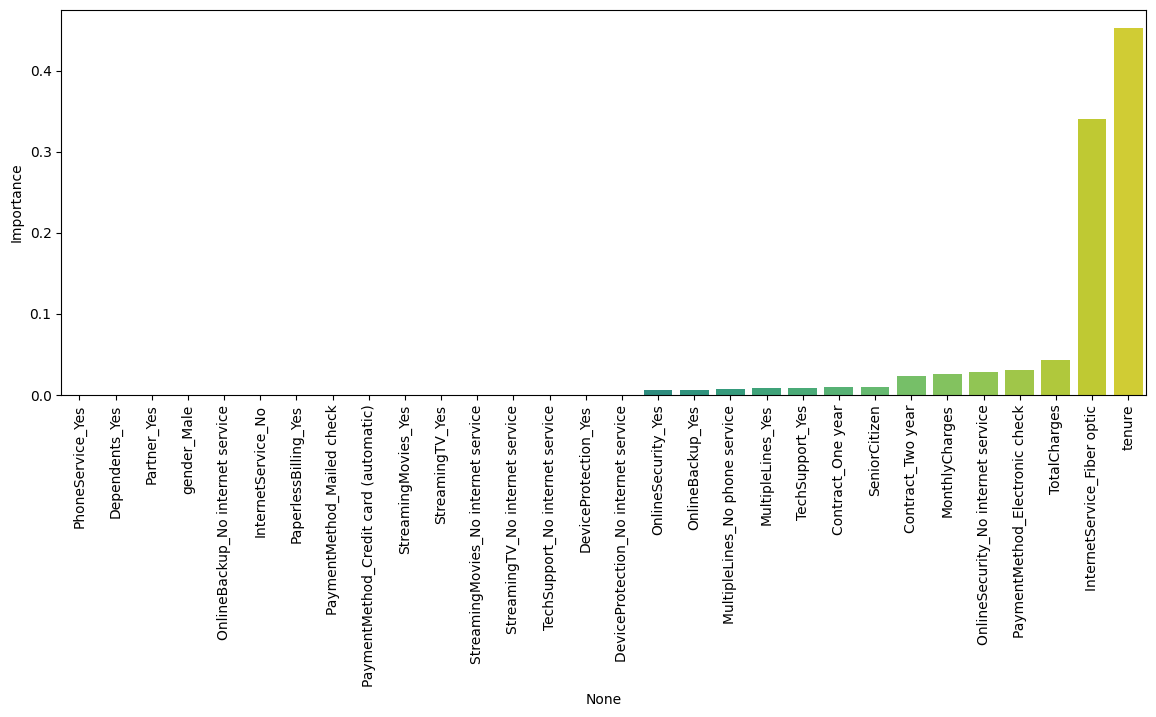

In [58]:
plt.figure(figsize=(14,5))
sns.barplot(x=feats.index,y=feats['Importance'],palette='viridis',hue=feats.index,legend=False)

plt.xticks(rotation=90);

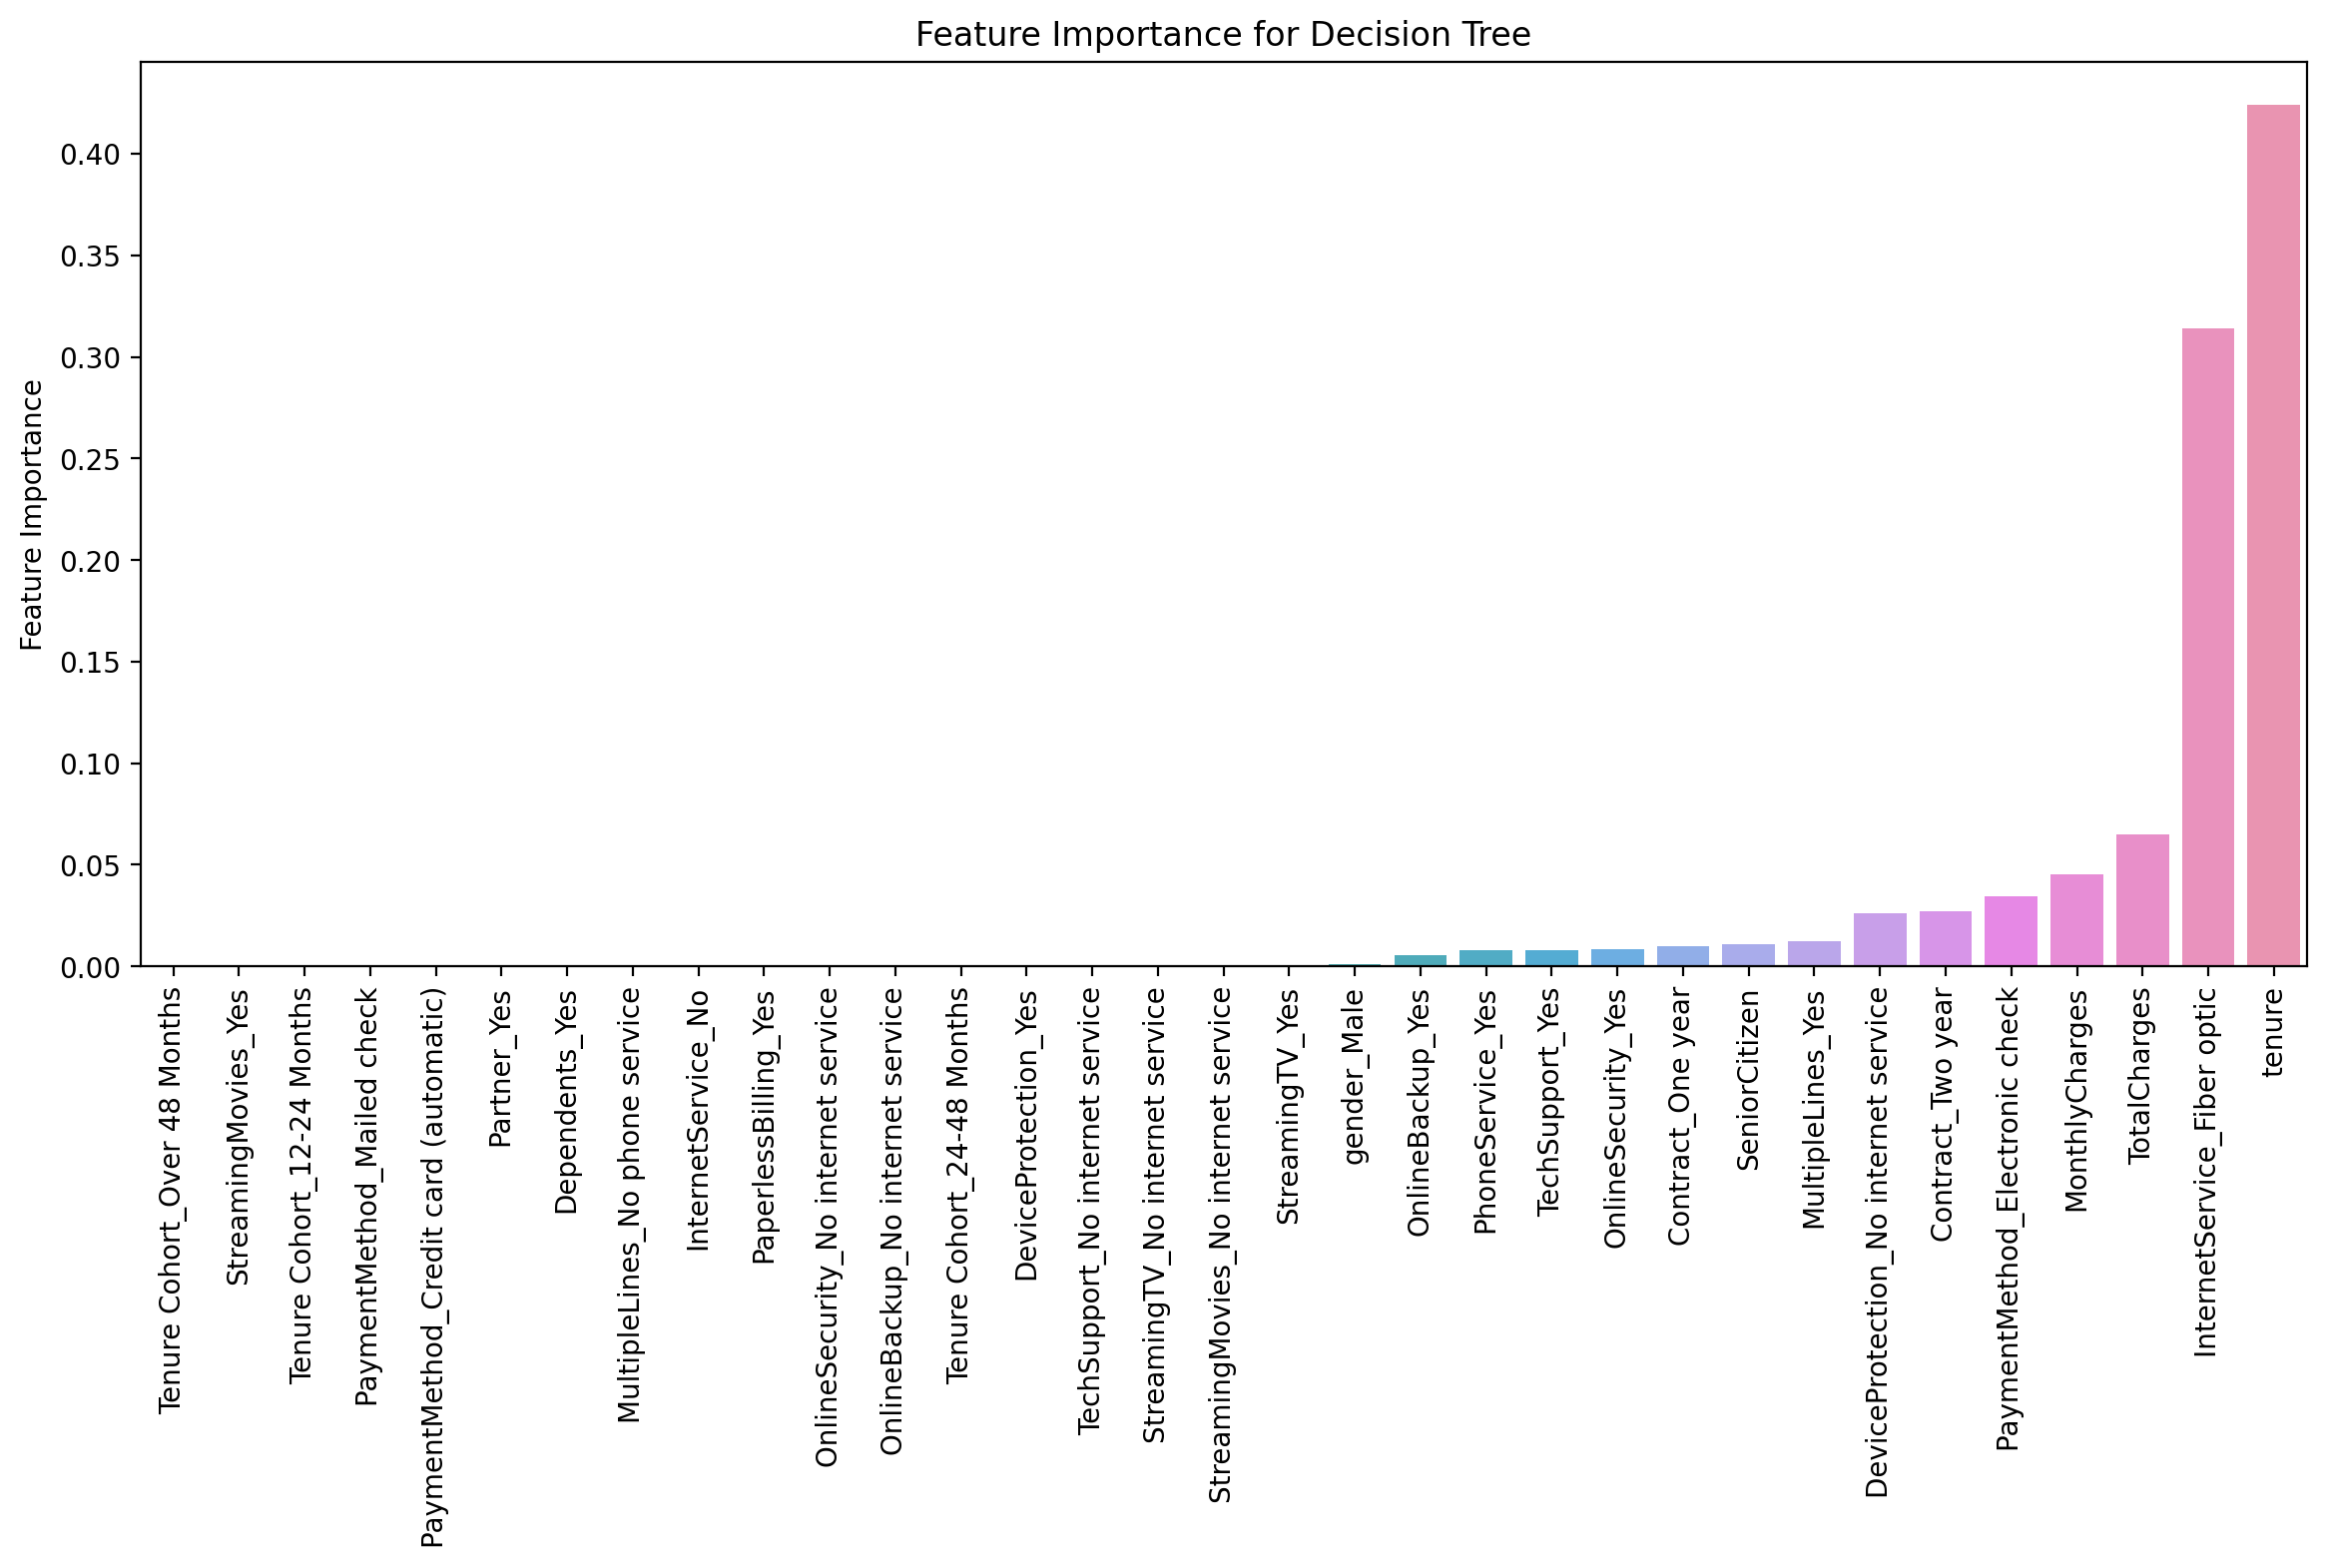

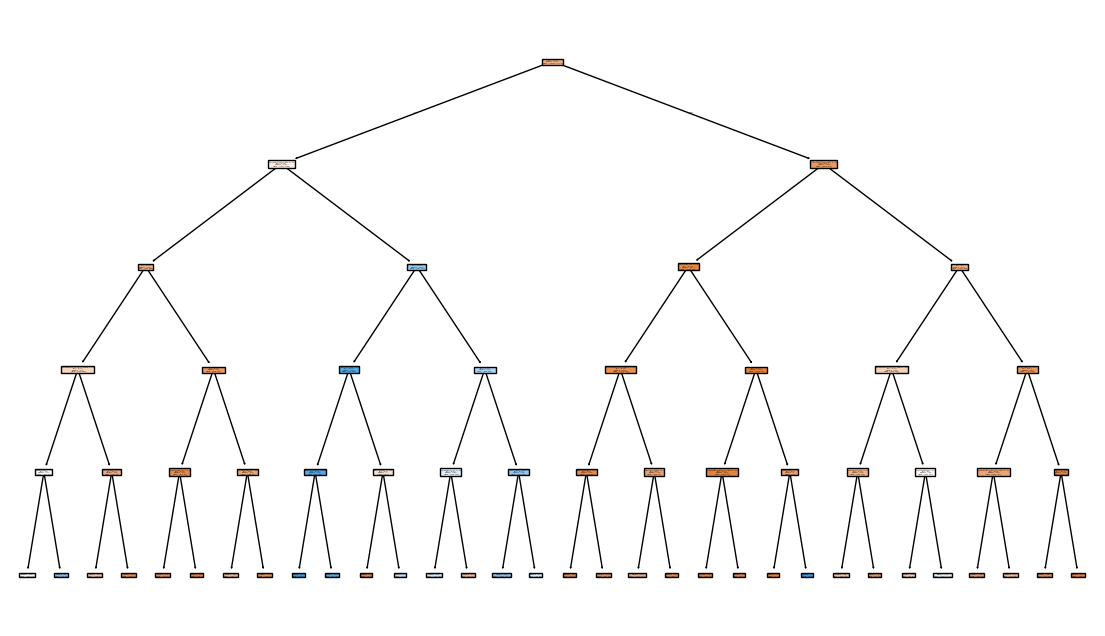

In [85]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8))

plot_tree(grid_dt.best_estimator_,feature_names=X.columns,filled=True)
plt.show()

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=128,random_state=101) # best between 64 - 128 in maths

params = {'max_depth':range(2,15),'class_weight':[None,'balanced']}
grid_rf = GridSearchCV(rf,params)
grid_rf.fit(X_train,y_train)

,estimator,RandomForestC...dom_state=101)
,param_grid,"{'class_weight': [None, 'balanced'], 'max_depth': range(2, 15)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,128


In [100]:
rf_preds = grid_rf.predict(X_test)
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.60      0.49      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.81      0.83      0.82       704



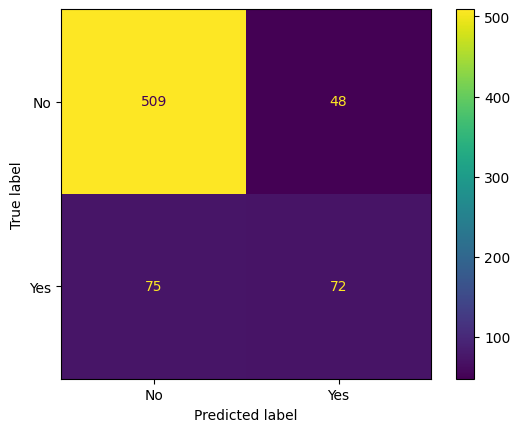

In [101]:
ConfusionMatrixDisplay.from_predictions(y_test,rf_preds)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=128,random_state=101)

params = {'max_depth':range(5,16),'learning_rate':[0.05,0.2],'max_features':['sqrt',None]}
grid_gb = GridSearchCV(gb,params,n_jobs=-1)
grid_gb.fit(X_train,y_train)

ERROR! Session/line number was not unique in database. History logging moved to new session 118


,estimator,GradientBoost...dom_state=101)
,param_grid,"{'learning_rate': [0.05, 0.2], 'max_depth': range(5, 16), 'max_features': ['sqrt', None]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [107]:
gb_preds = grid_gb.predict(X_test)
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.53      0.56       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.82       704



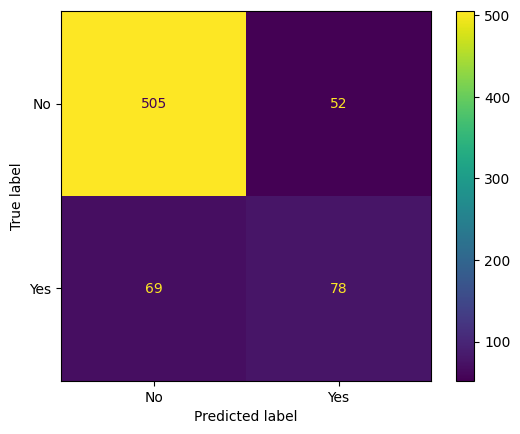

In [108]:
ConfusionMatrixDisplay.from_predictions(y_test,gb_preds)

**TASK: Analyze your results, which model performed best for you?**

In [294]:
# GRADIENT BOOSTING

### Great job!